In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
df=pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\datatrain.csv')
df.head()

,id,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,1,02/04/15 17:51,23.18,27.2720,426.0,721.25,0.004793,1
1,2,02/04/15 17:51,23.15,27.2675,429.5,714.00,0.004783,1
2,3,02/04/15 17:53,23.15,27.2450,426.0,713.50,0.004779,1
3,4,02/04/15 17:54,23.15,27.2000,426.0,708.25,0.004772,1
4,5,02/04/15 17:55,23.10,27.2000,426.0,704.50,0.004757,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17895 entries, 0 to 17894
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             17895 non-null  int64  
 1   date           17895 non-null  object 
 2   Temperature    17895 non-null  float64
 3   Humidity       17895 non-null  float64
 4   Light          17895 non-null  float64
 5   CO2            17895 non-null  float64
 6   HumidityRatio  17895 non-null  float64
 7   Occupancy      17895 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 1.1+ MB


In [4]:
df['date'].str.split('/').str[0]

0        02
1        02
2        02
3        02
4        02
         ..
17890    02
17891    02
17892    02
17893    02
17894    02
Name: date, Length: 17895, dtype: object

In [5]:
df['month']=df['date'].str.split('/').str[0].astype(int)
df['Date']=df['date'].str.split('/').str[1].astype(int)
df['year']=df['date'].str.split('/').str[2].str.split(' ').str[0].astype(int)
df['hours']=df['date'].str.split('/').str[2].str.split(' ').str[1].str.split(':').str[0].astype(int)
df['min']=df['date'].str.split('/').str[2].str.split(' ').str[1].str.split(':').str[1].astype(int)

In [6]:
df.drop(columns=['date'],inplace=True)

In [7]:
df

,id,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,month,Date,year,hours,min
0,1,23.180,27.2720,426.00,721.25,0.004793,1,2,4,15,17,51
1,2,23.150,27.2675,429.50,714.00,0.004783,1,2,4,15,17,51
2,3,23.150,27.2450,426.00,713.50,0.004779,1,2,4,15,17,53
3,4,23.150,27.2000,426.00,708.25,0.004772,1,2,4,15,17,54
4,5,23.100,27.2000,426.00,704.50,0.004757,1,2,4,15,17,55
...,...,...,...,...,...,...,...,...,...,...,...,...
17890,17891,20.815,27.7175,429.75,1505.25,0.004213,1,2,18,15,9,15
17891,17892,20.865,27.7450,423.50,1514.50,0.004230,1,2,18,15,9,16
17892,17893,20.890,27.7450,423.50,1521.50,0.004237,1,2,18,15,9,16
17893,17894,20.890,28.0225,418.75,1632.00,0.004279,1,2,18,15,9,17


In [8]:
df.isnull().sum()

id               0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
month            0
Date             0
year             0
hours            0
min              0
dtype: int64

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

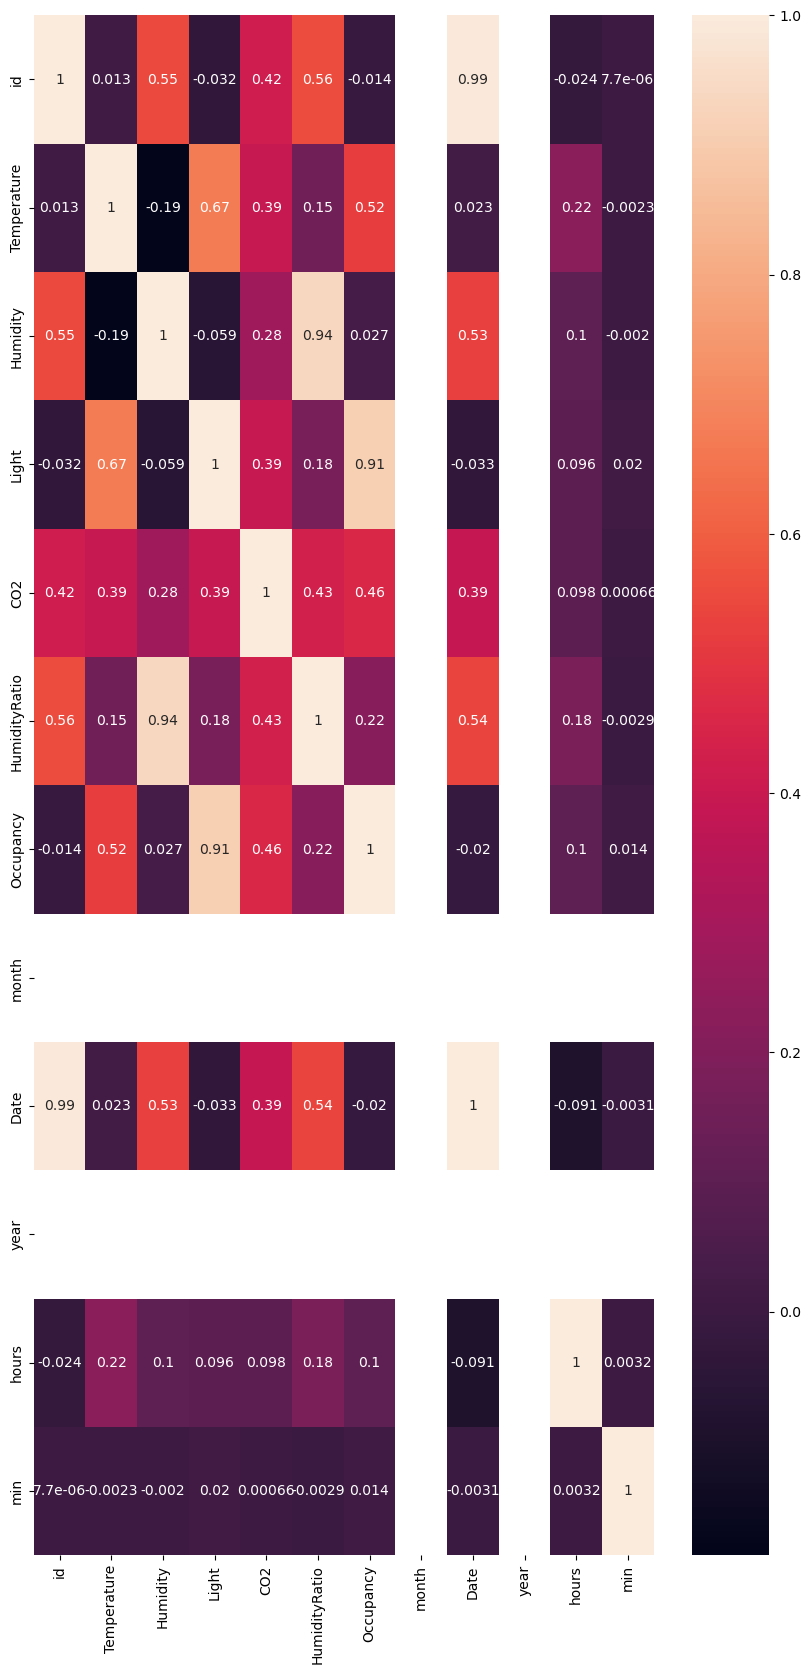

In [10]:
plt.figure(figsize=(10,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X = df.drop(columns=['Occupancy'])
y = df['Occupancy']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary to store classifiers and their names
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting Classifier": GradientBoostingClassifier()
}

# Loop through classifiers, fit them, and calculate accuracy
for name, clf in classifiers.items():
    # Fit model
    clf.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the result
    print(f"{name} Accuracy: {accuracy:.4f}")

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.9899
K-Nearest Neighbors Accuracy: 0.9922
Support Vector Machine Accuracy: 0.9832
Decision Tree Classifier Accuracy: 0.9933
Random Forest Classifier Accuracy: 0.9939
Naive Bayes Accuracy: 0.9620
Gradient Boosting Classifier Accuracy: 0.9913


In [12]:
df.shape

(17895, 12)

In [13]:
df.shape

(17895, 12)

In [15]:
df_test=pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\datatest.csv')
df_test

,id,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,140,02/02/15 14:19,23.700000,26.272000,585.200000,749.200000,0.004764,1
1,141,02/02/15 14:19,23.718000,26.290000,578.400000,760.400000,0.004773,1
2,142,02/02/15 14:21,23.730000,26.230000,572.666667,769.666667,0.004765,1
3,143,02/02/15 14:22,23.722500,26.125000,493.750000,774.750000,0.004744,1
4,144,02/02/15 14:23,23.754000,26.200000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...,...,...
2660,2800,02/04/15 10:38,24.290000,25.700000,808.000000,1150.250000,0.004829,1
2661,2801,02/04/15 10:40,24.330000,25.736000,809.800000,1129.200000,0.004848,1
2662,2802,02/04/15 10:40,24.330000,25.700000,817.000000,1125.800000,0.004841,1
2663,2803,02/04/15 10:41,24.356667,25.700000,813.000000,1123.000000,0.004849,1


In [16]:
df_test['month']=df_test['date'].str.split('/').str[0].astype(int)
df_test['Date']=df_test['date'].str.split('/').str[1].astype(int)
df_test['year']=df_test['date'].str.split('/').str[2].str.split(' ').str[0].astype(int)
df_test['hours']=df_test['date'].str.split('/').str[2].str.split(' ').str[1].str.split(':').str[0].astype(int)
df_test['min']=df_test['date'].str.split('/').str[2].str.split(' ').str[1].str.split(':').str[1].astype(int)

In [17]:
df_test.drop(columns=['date'],inplace=True)

In [18]:
X_test=df_test.drop(columns=['Occupancy'])
y_test=df_test['Occupancy']

In [19]:
for name, clf in classifiers.items():
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the result
    print(f"{name} Accuracy: {accuracy:.4f}")

Logistic Regression Accuracy: 0.9786
K-Nearest Neighbors Accuracy: 0.9538
Support Vector Machine Accuracy: 0.9745
Decision Tree Classifier Accuracy: 0.9662
Random Forest Classifier Accuracy: 0.9779
Naive Bayes Accuracy: 0.9760
Gradient Boosting Classifier Accuracy: 0.9775
